In [15]:
#convert the dataset from files to a python DataFrame
import pandas as pd
import os

#Read data and save into a file
def read_and_save():
    folder = 'aclImdb'
    labels = {'pos': 1, 'neg': 0}
    df = pd.DataFrame()
    
    for f in ('test', 'train'):
        for l in ('pos', 'neg'):
            path = os.path.join(folder, f, l)
            for file in os.listdir (path) :
                with open(os.path.join(path, file), 'r', encoding='utf-8') as infile:
                    txt = infile.read()
                    df = df.append( [[txt, labels[l]]], ignore_index=True)
    df.columns = ['review', 'sentiment']
    df.to_csv("movie_data.csv", index=False, encoding='utf-8')
    return df

#df = read_and_save()

In [104]:
import nltk
import re
import numpy as np

nltk.data.path.append("D:\\tools\\nltk_data")
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
df = pd.read_csv('movie_data.csv', encoding='utf-8')

In [14]:
df.tail()

,review,sentiment
49995,"Towards the end of the movie, I felt it was to...",0
49996,This is the kind of movie that my enemies cont...,0
49997,I saw 'Descent' last night at the Stockholm Fi...,0
49998,Some films that you pick up for a pound turn o...,0
49999,"This is one of the dumbest films, I've ever se...",0


In [56]:
reviews = df.review.str.cat(sep=' ')
reviews = re.sub(r"\W+", ' ', reviews)
#function to split text into word
tokens = word_tokenize(reviews.lower())

stop_words = set(stopwords.words('english'))
tokens = [w for w in tokens if not w in stop_words]
vocabulary = set(tokens)

print(len(vocabulary))

frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]

101786


['br',
 'movie',
 'film',
 'one',
 'like',
 'good',
 'time',
 'even',
 'would',
 'story',
 'really',
 'see',
 'well',
 'much',
 'bad',
 'get',
 'people',
 'great',
 'also',
 'first',
 'made',
 'make',
 'way',
 'could',
 'movies',
 'characters',
 'think',
 'watch',
 'character',
 'films',
 'two',
 'many',
 'seen',
 'love',
 'plot',
 'never',
 'life',
 'acting',
 'show',
 'best',
 'know',
 'little',
 'ever',
 'man',
 'better',
 'end',
 'scene',
 'still',
 'say',
 'scenes']

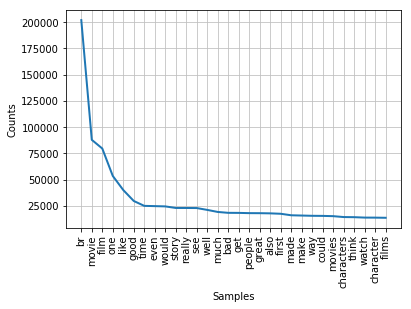

In [59]:
frequency_dist.plot(30, cumulative=False)

In [60]:
tokens[0:50]

['went',
 'saw',
 'movie',
 'last',
 'night',
 'coaxed',
 'friends',
 'mine',
 'admit',
 'reluctant',
 'see',
 'knew',
 'ashton',
 'kutcher',
 'able',
 'comedy',
 'wrong',
 'kutcher',
 'played',
 'character',
 'jake',
 'fischer',
 'well',
 'kevin',
 'costner',
 'played',
 'ben',
 'randall',
 'professionalism',
 'sign',
 'good',
 'movie',
 'toy',
 'emotions',
 'one',
 'exactly',
 'entire',
 'theater',
 'sold',
 'overcome',
 'laughter',
 'first',
 'half',
 'movie',
 'moved',
 'tears',
 'second',
 'half',
 'exiting',
 'theater']

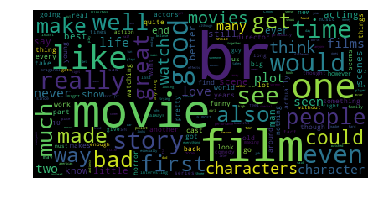

In [124]:
wordcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wordcloud)
plt.axis("off")
#plt.figure(figsize=(15, 10))
plt.show()

In [65]:
df.head()

,review,sentiment
0,I went and saw this movie last night after bei...,1
1,Actor turned director Bill Paxton follows up h...,1
2,As a recreational golfer with some knowledge o...,1
3,"I saw this film in a sneak preview, and it is ...",1
4,Bill Paxton has taken the true story of the 19...,1


In [80]:
X_train = df.loc[:24999, 'review'].values
y_train = df.loc[:24999, 'sentiment'].values
X_test = df.loc[25000:, 'review'].values
y_test = df.loc[25000:, 'sentiment'].values

In [125]:
vectorizer = TfidfVectorizer(stop_words='english', norm='l2', max_features=10000, sublinear_tf=True, ngram_range=(1, 2)) #, max_features=10000
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)

print(train_vectors.shape, test_vectors.shape)

(25000, 10000) (25000, 10000)


In [126]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB().fit(train_vectors, y_train)

In [127]:
from  sklearn.metrics  import classification_report

predicted = clf.predict(test_vectors)

In [128]:
#print(accuracy_score(y_test,predicted))
np.mean(predicted == y_test)

0.85444

In [129]:
print(classification_report(y_test, predicted, target_names=['neg', 'pos']))

             precision    recall  f1-score   support

        neg       0.86      0.85      0.85     12500
        pos       0.85      0.86      0.86     12500

avg / total       0.85      0.85      0.85     25000



In [130]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predicted)

0.85444